In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, json
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.metrics import confusion_matrix
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
Filetype=input('Load big file (1) or small file (2)? ')
if Filetype==2 :
    data=pd.read_csv('data/Sdata_for_ML.csv',header=0)
else:
    data=pd.read_csv('data/Bdata_for_ML.csv',header=0)
data=data.drop(['Unnamed: 0',],axis=1)    

Load big file (1) or small file (2)? 1


In [ ]:
data.info(10)

##  Small Tree ML

In [ ]:
data=data.drop(['is_starred','usd_pledged','pledge_perc', 'staff_pick',],axis=1)
mod1=data

In [ ]:
print(len(mod1))
corr_df=mod1.corr()
#corr_df[corr_df['state_num']==1]
#corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ]

In [ ]:
cor_st=corr_df.loc['state_num']
print(cor_st.nsmallest(50))
print(cor_st.nlargest(50))


In [ ]:
mod1_params= ['goal','launched-created','category.slug_food','category.slug_technology']


In [ ]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

Decision Tree visualization

In [ ]:


dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = Dtree_Params, 
                           class_names = ["Succeed", "Fail" ],
                           rounded = True, filled=True, special_characters=True,precision=2)
graph = graphviz.Source(dot_data) 
graph.format='png'
graph.render()
graph

In [ ]:
# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

##  Large Tree ML

In [ ]:
para=mod1.drop(['state_num'],axis=1)
para.columns

In [ ]:
Dtree_Params=para.columns
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

## Precision plot graph 

In [ ]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

In [ ]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Full tree")
plt.legend(loc = "best")

## Roc Curve Plotting

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba[:,1])

In [ ]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "Full tree")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the Full tree is: ", roc_auc_score(Y_test, Y_test_proba[:,1]) )

## Random forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 2, n_jobs= -1)
rnd_clf.fit (X_train, Y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred_rf)

In [ ]:
recall_score(Y_test, y_pred_rf)

In [ ]:
precision_score(Y_test, y_pred_rf)

In [ ]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc = "best")
plt.show()

In [ ]:
roc_auc_score(Y_test, y_rf_proba[:,1])

In [ ]:
feature_score = rnd_clf.feature_importances_
feature_score

In [ ]:
feature_names = list(X_train)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
#df_feature_score.head()
df_feature_score_short=df_feature_score.drop(df_feature_score.index[12:])
df_feature_score_short

In [ ]:
sns.barplot(y="feature", x="score", data=df_feature_score_short)

## GBM

In [ ]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, Y_train)

In [ ]:
y_pred_gb = clf_gb.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred_gb)

In [ ]:
recall_score(Y_test, y_pred_gb)

In [ ]:
precision_score(Y_test, y_pred_gb)

In [ ]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, y_gb_proba[:,1])

y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

## Precision graph plots for all methods

In [ ]:
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_true = Y_test, probas_pred = y_gb_proba[:,1])
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_true = Y_test, probas_pred = y_rf_proba[:,1])
precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])

plt.plot (thresholds, precisions[:-1], "r"+"--", label="Precision Full Tree")
plt.plot (thresholds, recalls[:-1], "r"+"-", label="Recall Full Tree ")
plt.plot (thresholds_GB, precisions_GB[:-1], "b"+"--", label="Precision GB")
plt.plot (thresholds_GB, recalls_GB[:-1], "b"+"-", label="Recall GB")
plt.plot (thresholds_RF, precisions_RF[:-1], "c"+"--", label="Precision RF")
plt.plot (thresholds_RF, recalls_RF[:-1], "c"+"-", label="Recall RF")

plt.xlabel("Threshold")
plt.legend(frameon=False)
plt.ylim([0,1])


## Prepare data for Regression

In [3]:
# Linear Regression imports
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.metrics import mean_squared_error

In [19]:
Filetype=input('Load big file (1) or small file (2)? ')
if Filetype==2 :
    data=pd.read_csv('data/Sdata_for_ML.csv',header=0)
else:
    data=pd.read_csv('data/Bdata_for_ML.csv',header=0)
data=data.drop(['Unnamed: 0',],axis=1)   

Load big file (1) or small file (2)? 1


In [20]:
#define range of data
data_r=data[data['pledge_perc']<300]
data_r=data_r[data_r['pledge_perc']>=100]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Columns: 248 entries, is_starred to deadline_day_in_week_7
dtypes: bool(2), float64(9), int64(237)
memory usage: 18.0 MB


## Linear Regression

In [ ]:
mask = data_r.columns.str.contains('category.name')
mask[1]=True #add goal to parameters
mask[4]=True #add staff pick to parameters
mask[18]=True #add launched-created
mask[27]=True #add deadline-launched
lin_reg_params=data_r.columns[mask]
lin_reg_params

In [ ]:
#define parameters for regression
y = data_r [['pledge_perc']]
#X = data_r[['goal','deadline-launched','launched-created','category.id']]
X = data_r[lin_reg_params]

In [ ]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=8)

In [ ]:
#perform regression
lin_reg.fit(X_train, y_train)

In [ ]:
print("predicted y = ", lin_reg.coef_, " * X + ", lin_reg.intercept_)

In [ ]:
y_test_pred_numeric = lin_reg.predict(X_test)

In [ ]:
lin_reg.score(X_test, y_test)
#R square score

In [ ]:
r2_score(y_test, y_test_pred_numeric) #another method for r^2

In [ ]:
mean_squared_error(y_test, y_test_pred_numeric)

In [ ]:
plt.subplots(figsize=(20,15))
ax= sns.residplot(y_test, y_test-y_test_pred_numeric, color="g")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15})
ax.set(xlabel='Y-test', ylabel='Residual = Y-predicted - Y-test',title="Linear Regression")

# Polynomial Regression

In [39]:
#define parameters for regression
y = data_r [['pledge_perc']]
X = data_r[['goal','deadline-launched','launched-created']]
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=8)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=5)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_p, y_train)

# Obtain coefficients
#lg.coef_


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Predict
y_test_pred_numeric_p=lg.predict(X_test_p)

In [42]:
r2_score(y_test, y_test_pred_numeric_p)

0.050891649809840067

[Text(0,0.5,'Residual = Y-predicted - Y-test'),
 Text(0.5,0,'Y-test'),
 Text(0.5,1,'Polynomial Regression')]

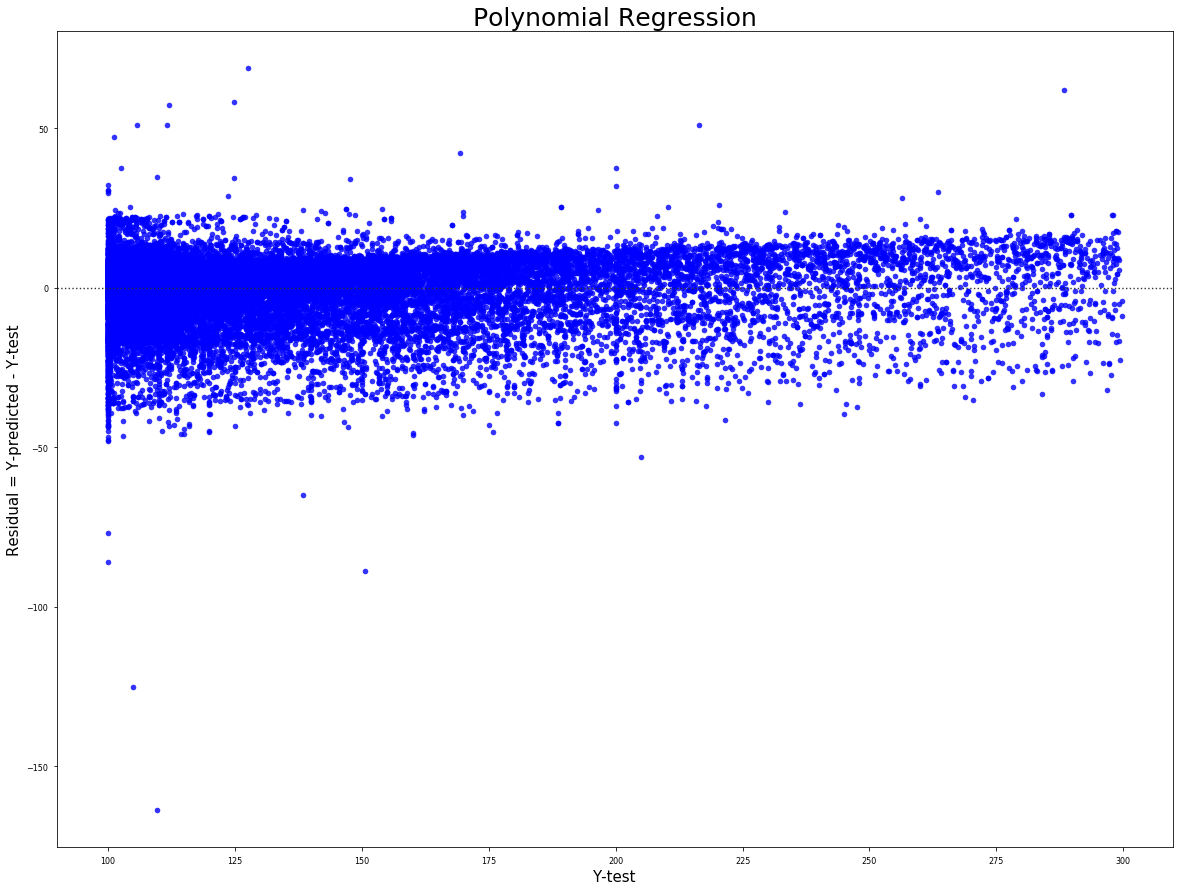

In [43]:
plt.subplots(figsize=(20,15))
ax= sns.residplot(y_test, y_test-y_test_pred_numeric_p, color="b")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15})
ax.set(xlabel='Y-test', ylabel='Residual = Y-predicted - Y-test',title="Polynomial Regression")